# Lectura de Datos

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_classif, f_regression

In [3]:
pd.set_option("display.max_columns", 100)
pd.set_option('display.float_format', lambda x: "{:,.2f}".format(x))

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/data/Examen_1/train_PAY_AMT3.csv', delimiter='|')
df.shape

(5625, 17)

In [6]:
df.head()

,CUSTOMER_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_4,PAY_5,PAY_6,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,15642,"50,000.00",2,3,1,47,-1,-1,-1,"3,416.00","2,040.00","30,430.00",257.00,"2,044.00","30,430.00",257.00,0.00
1,8038,"180,000.00",2,1,1,36,-2,-2,-2,"4,629.00","3,007.00","5,827.00","1,118.00","3,007.00","5,827.00","1,200.00","1,030.00"
2,4527,"350,000.00",2,1,3,48,-1,-1,-1,"154,505.00","19,653.00","26,963.00","55,533.00","19,751.00","27,070.00","55,613.00","11,811.00"
3,13313,"230,000.00",1,1,2,32,-2,-2,-2,"1,257.00",0.00,"1,169.00",641.00,0.00,"1,169.00",641.00,0.00
4,27112,"10,000.00",2,2,2,22,0,0,0,"8,775.00","7,092.00","7,410.00","7,311.00",176.00,"1,253.00","2,311.00","3,101.00"


__Diccionario de datos__

* CUSTOMER ID: Identificador de cada cliente
* LIMIT BAL: Monto de la línea de crédito
* SEX: Genero (1=masculino, 2=femenino)
* EDUCATION: (1=preparatoria, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido, 0=nulo)
* MARRIAGE: Estatus marital (1=casado, 2=soltero, 3=otros, 0=nulo)
* AGE: Edad en años.
* PAY 0: Estatus de pago en Septiembre, 2005 (
    -2=no uso (non use),
    0=uso, 
    -1=pago correcto, 
    1=pago retrasado por un mes, 
    2=pago retrasado por dos meses , 
    ... 8=pago retrasado por ocho meses, 
    \* pago retrasado por nueve o mas meses).
* PAY 2: Estatus de pago en Agosto, 2005 (La escala es igual que en PAY 0).
* PAY 3: Estatus de pago en Julio, 2005 (La escala es igual que en PAY 0).
* PAY 4: Estatus de pago en Junio, 2005 (La escala es igual que en PAY 0).
* PAY 5: Estatus de pago en Mayo, 2005 (La escala es igual que en PAY 0).
* PAY 6: Estatus de pago en Abril, 2005 (La escala es igual que en PAY 0).
* BILL AMT1: Monto por pagar en Septiembre, 2005
* BILL AMT2: Monto por pagar en Agosto, 2005
* BILL AMT3: Monto por pagar en Julio, 2005
* BILL AMT4: Monto por pagar en Junio, 2005
* BILL AMT5: Monto por pagar en Mayo, 2005
* BILL AMT6: Monto por pagar en Abril, 2005
* PAY AMT1: Cantidad pagada en Septiembre, 2005
* PAY AMT2: Cantidad pagada en Agosto, 2005
* PAY AMT3: Cantidad pagada en Julio, 2005
* PAY AMT4: Cantidad pagada en Junio, 2005
* PAY AMT5: Cantidad pagada en Mayo, 2005
* PAY AMT6: Cantidad pagada en Abril, 2005
* default.payment.next.month: Incumplimiento de pago (1=si, 0=no)


__Objetivo (REGRESIÓN)__

PAY AMT1: Cantidad pagada en Septiembre, 2005. Para esta solución deben usarse los conjuntos train_PAY_AMT1.csv y val PAY_AMT1.csv.

# Análisis Exploratorio de Datos

In [7]:
df.isna().sum() / df.shape[0]*100

CUSTOMER_ID   0.00
LIMIT_BAL     0.00
SEX           0.00
EDUCATION     0.00
MARRIAGE      0.00
AGE           0.00
PAY_4         0.00
PAY_5         0.00
PAY_6         0.00
BILL_AMT3     0.00
BILL_AMT4     0.00
BILL_AMT5     0.00
BILL_AMT6     0.00
PAY_AMT3      0.00
PAY_AMT4      0.00
PAY_AMT5      0.00
PAY_AMT6      0.00
dtype: float64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER_ID,"5,625.00","15,092.80","8,684.56",8.00,"7,553.00","15,055.00","22,611.00","29,998.00"
LIMIT_BAL,"5,625.00","168,022.40","129,275.26","10,000.00","50,000.00","140,000.00","240,000.00","800,000.00"
SEX,"5,625.00",1.61,0.49,1.00,1.00,2.00,2.00,2.00
EDUCATION,"5,625.00",1.86,0.78,0.00,1.00,2.00,2.00,6.00
MARRIAGE,"5,625.00",1.55,0.52,0.00,1.00,2.00,2.00,3.00
AGE,"5,625.00",35.52,9.29,21.00,28.00,34.00,41.00,75.00
PAY_4,"5,625.00",-0.22,1.17,-2.00,-1.00,0.00,0.00,7.00
PAY_5,"5,625.00",-0.27,1.13,-2.00,-1.00,0.00,0.00,7.00
PAY_6,"5,625.00",-0.30,1.15,-2.00,-1.00,0.00,0.00,7.00
BILL_AMT3,"5,625.00","47,128.41","68,949.14","-15,000.00","2,655.00","20,089.00","60,764.00","855,086.00"


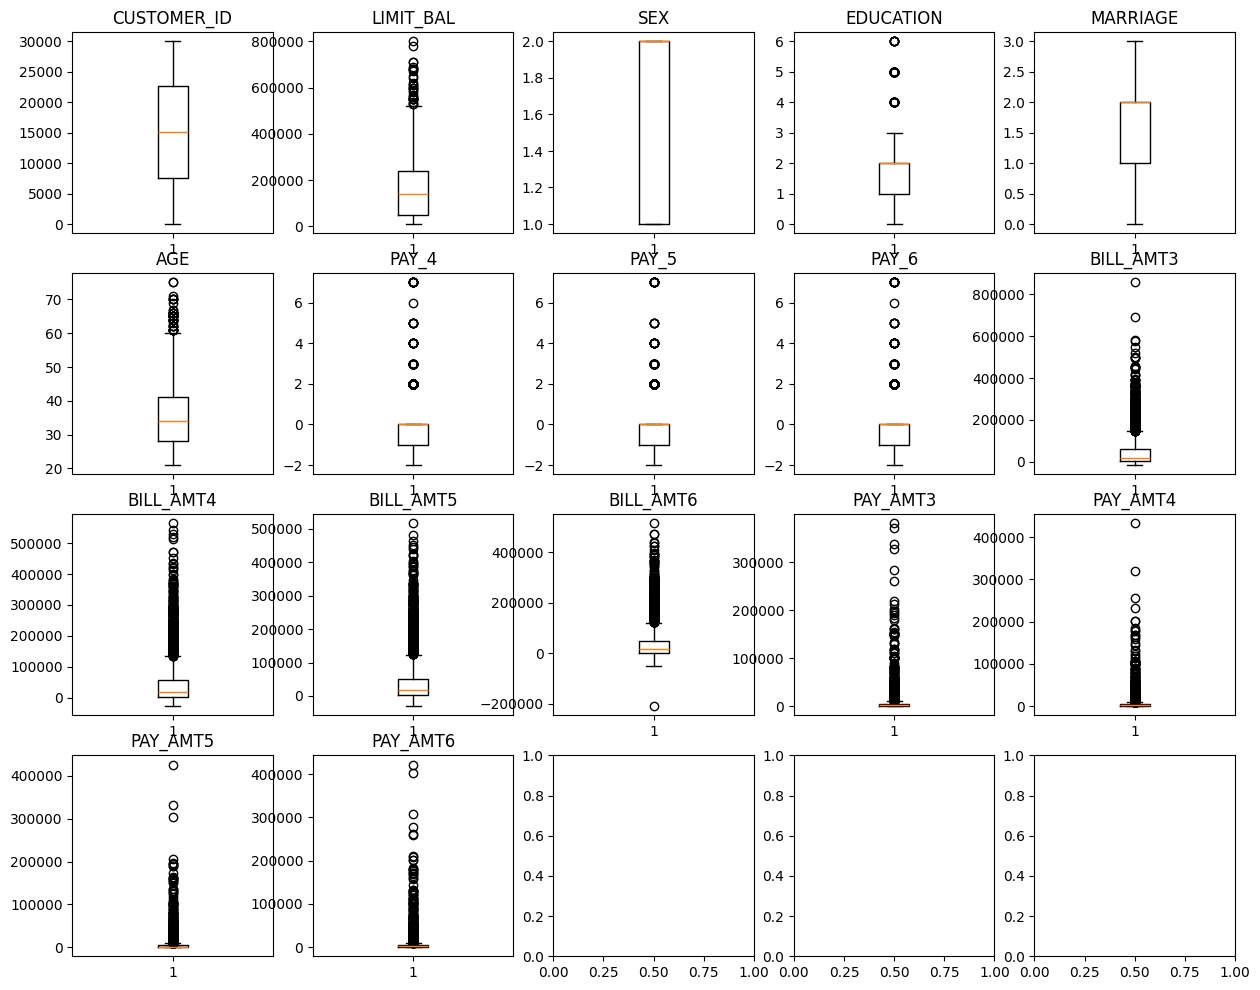

In [9]:
# numeric columns in DataFrame
col_df_num = df.columns.to_list()

n_cols = 5
n_rows = 4

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(15, 12))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(df[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break

### Eliminamos outliers

In [10]:
df[['PAY_AMT6', 'PAY_AMT5', 'PAY_AMT4']].describe(percentiles=[0.01, .25, .5, .75, .99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
PAY_AMT6,"5,625.00","5,115.98","17,779.55",0.00,0.00,94.00,"1,500.00","4,100.00","76,152.32","422,000.00"
PAY_AMT5,"5,625.00","4,856.36","15,717.36",0.00,0.00,291.00,"1,512.00","4,040.00","67,410.92","426,529.00"
PAY_AMT4,"5,625.00","4,847.48","15,198.83",0.00,0.00,291.00,"1,500.00","4,042.00","64,563.52","432,130.00"


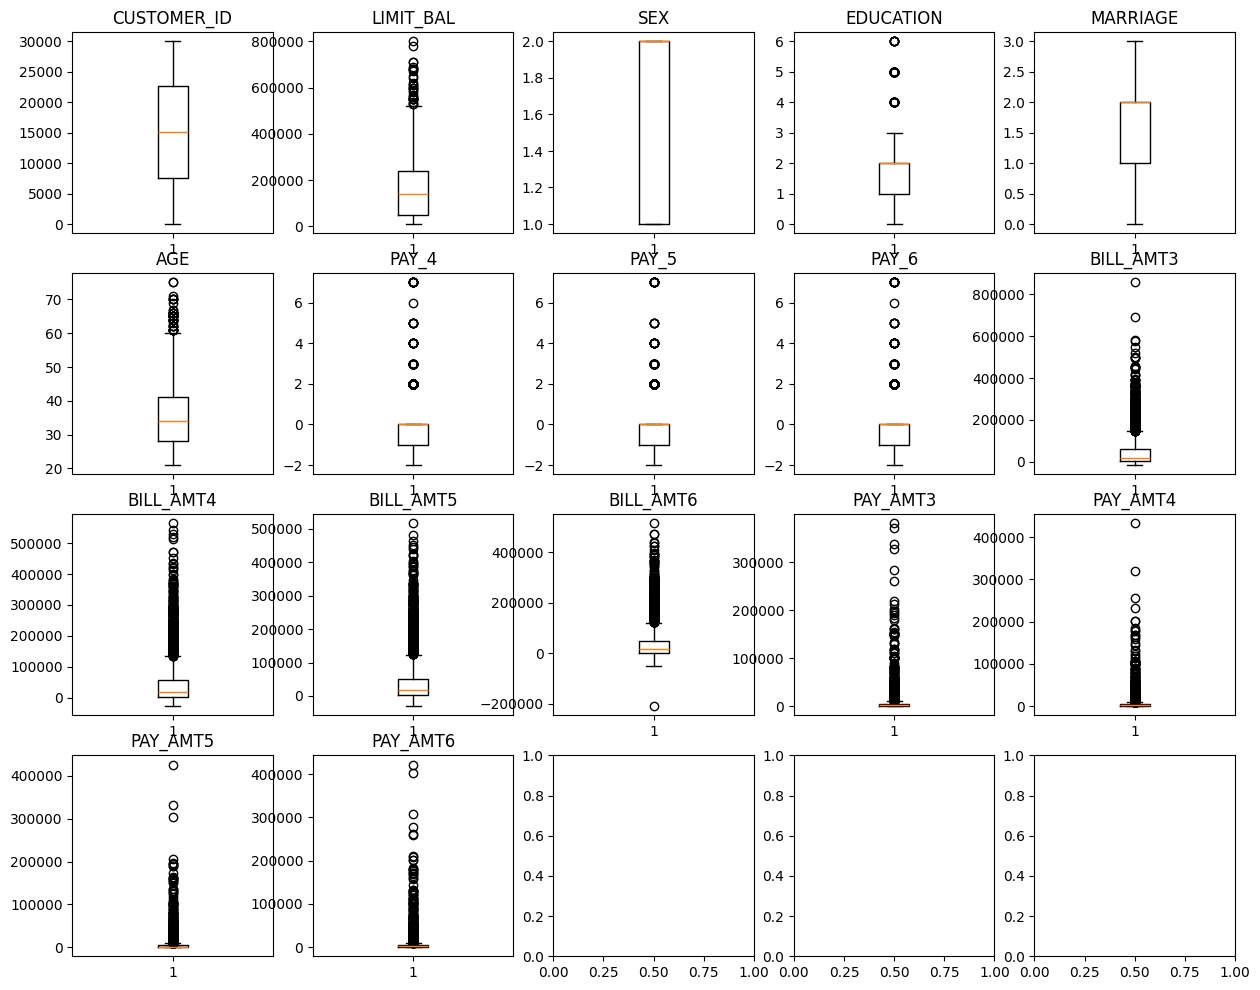

In [11]:
# numeric columns in DataFrame
col_df_num = df.columns.to_list()

n_cols = 5
n_rows = 4

#fig = plt.figure(layout="constrained", figsize=(10, 10))
fig = plt.figure(figsize=(15, 12))
ax_array = fig.subplots(n_rows, n_cols, squeeze=False)

index_col = 0
for row in range(n_rows):
    for col in range(n_cols):
        ax_array[row, col].boxplot(df[col_df_num[index_col]])
        ax_array[row, col].set_title(col_df_num[index_col])
        index_col += 1
        # to avoid error, break loop
        if index_col >= len(col_df_num):
            break

# Ingeniería de Variables

## Número de meses con retraso

In [12]:
# Orden de los meses
df[ ['PAY_6', 'PAY_5', 'PAY_4'] ].sample(5)

,PAY_6,PAY_5,PAY_4
890,0,0,-1
2376,-1,-1,-1
3646,0,0,0
4334,0,0,0
3128,0,0,0


In [13]:
df[ 'Num_Meses_Con_Retraso' ] = df[['PAY_6', 'PAY_5', 'PAY_4']].apply(lambda row: (row > 0).sum(), axis=1)
df[ 'Max_Meses_Con_Retraso' ] = df[['PAY_6', 'PAY_5', 'PAY_4']].apply(lambda row: max(list(filter(lambda x: x > 0, row)), default=0), axis=1)
df[ 'Max_Retraso_Reciente' ] = df[['PAY_4', 'PAY_4']].apply(lambda row: max(list(filter(lambda x: x > 0,row)), default=0), axis=1)

In [14]:
lst_var_1 = ['Num_Meses_Con_Retraso', 'Max_Meses_Con_Retraso', 'Max_Retraso_Reciente']

# orden de los meses y total de meses de retraso en el pago
df[ ['PAY_6', 'PAY_5', 'PAY_4'] + lst_var_1 ].sample(5)

,PAY_6,PAY_5,PAY_4,Num_Meses_Con_Retraso,Max_Meses_Con_Retraso,Max_Retraso_Reciente
3491,0,0,0,0,0,0
3292,0,0,0,0,0,0
5088,-1,-1,-1,0,0,0
4951,0,0,0,0,0,0
4046,2,2,0,2,2,0


### Saldo de la deuda

In [15]:
df[['BILL_AMT6','BILL_AMT5','BILL_AMT4','BILL_AMT3']].sample(5)

,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3
413,"138,574.00","140,384.00","169,291.00","170,663.00"
2939,"135,264.00","134,524.00","130,873.00","110,538.00"
5195,"42,352.00","38,680.00","37,071.00","35,665.00"
3968,"9,426.00","9,384.00","9,185.00","8,024.00"
5304,412.00,892.00,634.00,"62,779.00"


In [16]:
df[ 'Promedio_Deuda_Ultimos_3_Meses' ] = df[['BILL_AMT3','BILL_AMT4','BILL_AMT5']].apply(lambda row: row.mean(), axis=1)
df[ 'Cambio_Deuda_Reciente' ] = df[['BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']].apply(lambda row: row['BILL_AMT3'] - row['BILL_AMT4'], axis=1)
df[ 'Suma_Deuda_Total_Historica' ] = df[['BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.sum(), axis=1)
df[ 'Max_Deuda_Historica' ] = df[['BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.max(), axis=1)
df[ 'Utilizacion_Credito_Actual' ] = df.apply(lambda row: (row['BILL_AMT3'] / row['LIMIT_BAL'])*100*row['LIMIT_BAL'], axis=1)
df[ 'Prom_porcen_uso_Credito_Actual' ] = df.apply(lambda row: (row['BILL_AMT3'] / row['LIMIT_BAL'])*100, axis=1)
df[ 'Utilizacion_Credito_Promedio' ] = df.apply(lambda row: (row[['BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum()/ row['LIMIT_BAL']*6)*100 , axis=1)

In [17]:
lst_var_2 = ['Promedio_Deuda_Ultimos_3_Meses', 'Cambio_Deuda_Reciente', 'Suma_Deuda_Total_Historica', 'Max_Deuda_Historica',
                'Utilizacion_Credito_Actual', 'Prom_porcen_uso_Credito_Actual', 'Utilizacion_Credito_Promedio']
df[['LIMIT_BAL', 'BILL_AMT6', 'BILL_AMT5', 'BILL_AMT4', 'BILL_AMT3'] + lst_var_2].sample(5)

,LIMIT_BAL,BILL_AMT6,BILL_AMT5,BILL_AMT4,BILL_AMT3,Promedio_Deuda_Ultimos_3_Meses,Cambio_Deuda_Reciente,Suma_Deuda_Total_Historica,Max_Deuda_Historica,Utilizacion_Credito_Actual,Prom_porcen_uso_Credito_Actual,Utilizacion_Credito_Promedio
4272,"20,000.00","19,583.00","19,374.00","18,957.00","18,586.00","18,972.33",-371.00,"76,500.00","19,583.00","1,858,600.00",92.93,"2,295.00"
597,"390,000.00","1,343.00",343.00,0.00,0.00,114.33,0.00,"1,686.00","1,343.00",0.00,0.00,2.59
3733,"200,000.00","5,586.00","8,523.00","14,915.00","4,629.00","9,355.67","-10,286.00","33,653.00","14,915.00","462,900.00",2.31,100.96
5190,"230,000.00","2,491.00","3,750.00","3,313.00","2,140.00","3,067.67","-1,173.00","11,694.00","3,750.00","214,000.00",0.93,30.51
1655,"200,000.00",0.00,774.00,"3,270.00","9,090.00","4,378.00","5,820.00","13,134.00","9,090.00","909,000.00",4.54,39.40


### Cantidad pagada

In [18]:
df[['PAY_AMT6','PAY_AMT5','PAY_AMT4']].sample(5)

,PAY_AMT6,PAY_AMT5,PAY_AMT4
1709,0.00,0.00,0.00
2393,0.00,"3,000.00",0.00
3865,"1,178.00",0.00,"1,139.00"
3385,0.00,"6,328.00","3,000.00"
334,"7,267.00","163,123.00","7,341.00"


In [19]:
def get_mean_pay(row):
    m = []
    if row['PAY_AMT6'] > 0:
        m.append( row['BILL_AMT6']/row['PAY_AMT6'] )
    if row['PAY_AMT5'] > 0:
        m.append( row['BILL_AMT5']/row['PAY_AMT5'] )
    if row['PAY_AMT4'] > 0:
        m.append( row['BILL_AMT4']/row['PAY_AMT4'] )
    #if row['PAY_AMT3'] > 0:
    #    m.append( row['BILL_AMT3']/row['PAY_AMT3'] )
    #if row['PAY_AMT2'] > 0:
    #    m.append( row['BILL_AMT2']/row['PAY_AMT2'] )
    
    if len(m) != 0:
        return  sum(m) / len(m)
    
    return 0

In [20]:
df['Promedio_Pago_Ultimos_Meses'] = df[['PAY_AMT4','PAY_AMT5','PAY_AMT6']].apply(lambda row: row.sum()/3, axis=1)
df['Suma_Pagos_Historicos'] = df[['PAY_AMT4','PAY_AMT5','PAY_AMT6',]].apply(lambda row: row.sum(), axis=1)
df['Prom_Porcentaje_Pagos_Historicos'] = df.apply(lambda row: get_mean_pay(row=row), axis=1)
df['Cambio_Pago_Reciente'] = df.apply(lambda row: row['PAY_AMT4'] - row['PAY_AMT5'], axis=1)
df['Ratio_Pago_Factura_Anterior'] = np.where(df['BILL_AMT4'] > 0, (df['PAY_AMT4'] / df['BILL_AMT4'])*100, 0)

In [21]:
df['LIMIT_BAL_sq'] = df['LIMIT_BAL'] ** 2

In [22]:
lst_var_3 = ['Promedio_Pago_Ultimos_Meses', 'Suma_Pagos_Historicos', 'Prom_Porcentaje_Pagos_Historicos',
             'Cambio_Pago_Reciente', 'Ratio_Pago_Factura_Anterior', 'LIMIT_BAL_sq']
df[['PAY_AMT6','PAY_AMT5','PAY_AMT4'] + lst_var_3].sample(5)

,PAY_AMT6,PAY_AMT5,PAY_AMT4,Promedio_Pago_Ultimos_Meses,Suma_Pagos_Historicos,Prom_Porcentaje_Pagos_Historicos,Cambio_Pago_Reciente,Ratio_Pago_Factura_Anterior,LIMIT_BAL_sq
4849,"2,000.00","48,425.00",0.00,"16,808.33","50,425.00",12.11,"-48,425.00",0.00,"152,100,000,000.00"
4444,396.00,396.00,546.00,446.00,"1,338.00",1.03,150.00,137.88,"40,000,000,000.00"
4170,0.00,"4,626.00","1,398.00","2,008.00","6,024.00",0.15,"-3,228.00",0.00,"78,400,000,000.00"
5169,"3,510.00","3,684.00","3,461.00","3,551.67","10,655.00",27.48,-223.00,3.47,"10,000,000,000.00"
5362,"2,100.00","2,121.00","1,855.00","2,025.33","6,076.00",38.24,-266.00,2.45,"10,000,000,000.00"


### Perfil del cliente

In [23]:
df[ 'Edad_x_Limite_Credito' ] = df.apply(lambda row: row['AGE'] * row['LIMIT_BAL'], axis=1)

In [24]:
lst_var_4 = ['Edad_x_Limite_Credito']
df[['AGE', 'LIMIT_BAL'] + lst_var_4].sample(5)

,AGE,LIMIT_BAL,Edad_x_Limite_Credito
709,55,"20,000.00","1,100,000.00"
3078,31,"270,000.00","8,370,000.00"
3734,33,"170,000.00","5,610,000.00"
1670,27,"210,000.00","5,670,000.00"
5511,35,"490,000.00","17,150,000.00"


In [25]:
# (1=preparatoria, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido, 0=nulo)
df['EDUCATION'].replace({4:0,5:0,6:0}, inplace=True) # clasificacion de valores desconocido
df['EDUCATION'].replace({3:2, 2:3}, inplace=True) # cambiamos el orden de los valores, para darle mas peso
display(df['EDUCATION'].value_counts().sort_index())
df['EDUCATION'] = df['EDUCATION']**2
display(df['EDUCATION'].value_counts().sort_index())

EDUCATION
0      84
1    1972
2     934
3    2635
Name: count, dtype: int64

EDUCATION
0      84
1    1972
4     934
9    2635
Name: count, dtype: int64

In [26]:
# * MARRIAGE: Estatus marital (1=casado, 2=soltero, 3=otros, 0=nulo)
display(df['MARRIAGE'].value_counts().sort_index())
df['MARRIAGE'].replace({0:2, 3:2}, inplace=True)
display(df['MARRIAGE'].value_counts().sort_index())

MARRIAGE
0      10
1    2578
2    2979
3      58
Name: count, dtype: int64

MARRIAGE
1    2578
2    3047
Name: count, dtype: int64

In [27]:
df['SEX'] = df['SEX'].astype(str)
df['EDUCATION'] = df['EDUCATION'].astype(str)
df['MARRIAGE'] = df['MARRIAGE'].astype(str)

In [28]:
df['PAY_4'] = df['PAY_4'].map(lambda x: x if x > 0 else 0)
df['PAY_5'] = df['PAY_5'].map(lambda x: x if x > 0 else 0)
df['PAY_6'] = df['PAY_6'].map(lambda x: x if x > 0 else 0)

## Clasificación de variables

In [29]:
# Unidad muestral
var_um = ['CUSTOMER_ID']

# Variables categoricas
var_cat = ['SEX', 'EDUCATION', 'MARRIAGE',
                    'PAY_4',    'PAY_5',    'PAY_6']

# Variables numericas
var_num = ['LIMIT_BAL','AGE',
          'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                                               'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
          ]# + lst_var_1 + lst_var_2 + lst_var_3 + lst_var_4
          #] + lst_var_4

var_tgt = ['PAY_AMT3']

print( len( var_um + var_cat + var_num + var_tgt ) )
print( df.shape )

17
(5625, 34)


In [30]:
X = df.drop(columns=var_cat)[var_num].join(pd.get_dummies(df[var_cat], dtype='int'))
y = df[ var_tgt ]

In [31]:
X.sample(5)

,LIMIT_BAL,AGE,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_4,PAY_5,PAY_6,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_4,EDUCATION_9,MARRIAGE_1,MARRIAGE_2
1125,"50,000.00",37,"29,500.00","28,914.00","29,529.00","29,319.00","1,197.00","1,009.00",990.00,0,0,0,1,0,0,0,0,1,1,0
1958,"140,000.00",40,"32,808.00","35,342.00","35,965.00","36,741.00","1,500.00","1,500.00","1,484.00",0,2,2,0,1,0,0,1,0,1,0
612,"100,000.00",31,"78,178.00","79,858.00","74,785.00","54,849.00","3,000.00","1,989.00","1,987.00",0,0,0,0,1,0,0,0,1,1,0
5179,"130,000.00",40,989.00,989.00,990.00,702.00,992.00,703.00,992.00,0,0,0,0,1,0,1,0,0,1,0
3135,"50,000.00",45,"5,639.00","6,389.00","7,130.00","7,857.00","1,000.00","1,000.00","1,000.00",0,0,0,1,0,0,0,1,0,1,0


In [32]:
X.sample(5)

,LIMIT_BAL,AGE,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_4,PAY_5,PAY_6,SEX_1,SEX_2,EDUCATION_0,EDUCATION_1,EDUCATION_4,EDUCATION_9,MARRIAGE_1,MARRIAGE_2
4615,"330,000.00",27,"233,421.00","201,240.00","186,444.00","158,521.00","6,497.00","6,037.00","5,141.00",0,0,0,0,1,0,0,0,1,0,1
5484,"180,000.00",48,760.00,0.00,0.00,245.00,0.00,245.00,884.00,0,0,0,0,1,0,0,0,1,1,0
3987,"50,000.00",50,"49,388.00","48,853.00","47,765.00","48,145.00","1,520.00","2,202.00",934.00,0,0,0,0,1,0,0,0,1,1,0
1383,"170,000.00",25,"91,409.00","90,720.00","83,208.00","83,956.00","3,000.00","3,200.00","3,200.00",0,0,0,1,0,0,1,0,0,0,1
1084,"80,000.00",35,"10,816.00","9,746.00","9,798.00","10,401.00",490.00,"1,402.00",201.00,0,0,0,0,1,0,0,0,1,1,0


<Axes: >

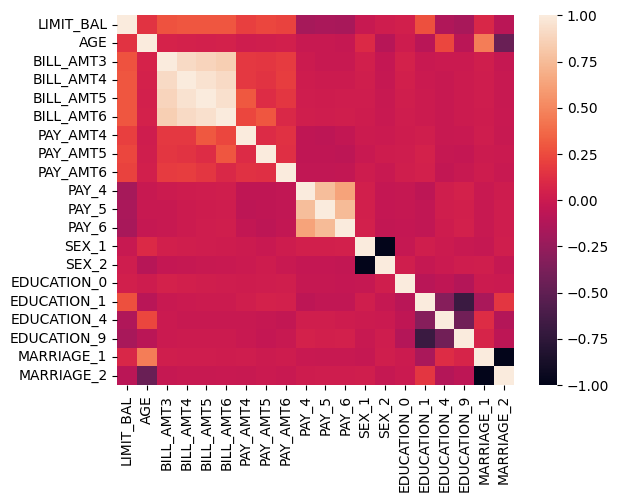

In [33]:
sns.heatmap(X.corr())

In [34]:
#sns.pairplot( X_train.sample(1000) )

# Modelo

## Mejores variables

In [35]:
X.shape

(5625, 20)

In [36]:
kb = SelectKBest( k=15, score_func=f_regression )
kb.fit(X, y)
kb.get_feature_names_out()
ls_best = [x for x, y in zip(X.columns, kb.get_support()) if y]
print(ls_best)

X_train = pd.DataFrame(kb.transform(X), columns=ls_best)
y_train = y

X_train_cols = ls_best

['LIMIT_BAL', 'AGE', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'PAY_4', 'PAY_5', 'PAY_6', 'EDUCATION_1', 'EDUCATION_4', 'EDUCATION_9']


In [37]:
X_train.sample(5)

,LIMIT_BAL,AGE,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_4,PAY_5,PAY_6,EDUCATION_1,EDUCATION_4,EDUCATION_9
479,"60,000.00",35.00,"47,343.00","29,164.00","27,829.00","27,574.00","2,000.00","1,088.00","3,000.00",0.00,0.00,0.00,0.00,0.00,1.00
2933,"10,000.00",45.00,"9,815.00","9,508.00","9,754.00","10,192.00",400.00,600.00,200.00,2.00,0.00,0.00,0.00,0.00,1.00
4736,"210,000.00",52.00,0.00,0.00,"1,858.00",45.00,"1,858.00",45.00,"3,667.00",0.00,0.00,0.00,1.00,0.00,0.00
3426,"20,000.00",23.00,"7,853.00","8,565.00","9,565.00","12,065.00","1,000.00","2,500.00","1,000.00",0.00,0.00,0.00,1.00,0.00,0.00
3033,"10,000.00",56.00,"6,101.00","6,711.00","7,258.00","7,777.00","2,000.00","2,000.00","2,000.00",0.00,0.00,0.00,0.00,1.00,0.00


## Ajuste del modelo

SCORE:  0.39953835339410515 [0.36625467 0.22984446 0.46605498 0.42957588]
MEAN 0.3729324970187185
STD 0.08999868275272989
R-squared: 0.3995
Mean squared error: 190039186.5633
Root mean squared error: 13785.4701
Mean Absolute Error: 5617.8604


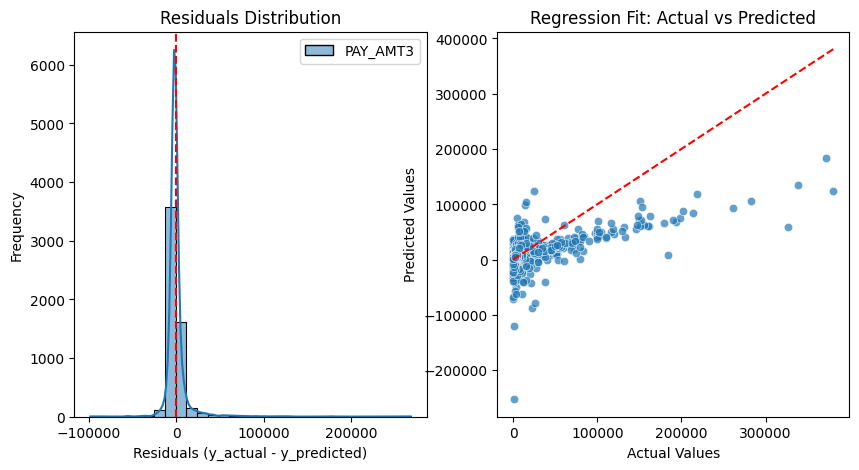

LIMIT_BAL = 0.0122277741
AGE = -3.6895021528
BILL_AMT3 = -0.3032191151
BILL_AMT4 = 0.4869621647
BILL_AMT5 = -0.0496065438
BILL_AMT6 = -0.095577252
PAY_AMT4 = 0.1910650592
PAY_AMT5 = 0.1271290406
PAY_AMT6 = 0.0538841854
PAY_4 = -1840.2639309937
PAY_5 = 1161.5148438323
PAY_6 = -281.7814255759
EDUCATION_1 = -1138.9803345569
EDUCATION_4 = -1017.0605372717
EDUCATION_9 = -1690.6259556344
Intercept: [2152.23602178]

Feature Coefficients:
         Feature  Coefficient
0     LIMIT_BAL         0.01
1           AGE        -3.69
2     BILL_AMT3        -0.30
3     BILL_AMT4         0.49
4     BILL_AMT5        -0.05
5     BILL_AMT6        -0.10
6      PAY_AMT4         0.19
7      PAY_AMT5         0.13
8      PAY_AMT6         0.05
9         PAY_4    -1,840.26
10        PAY_5     1,161.51
11        PAY_6      -281.78
12  EDUCATION_1    -1,138.98
13  EDUCATION_4    -1,017.06
14  EDUCATION_9    -1,690.63


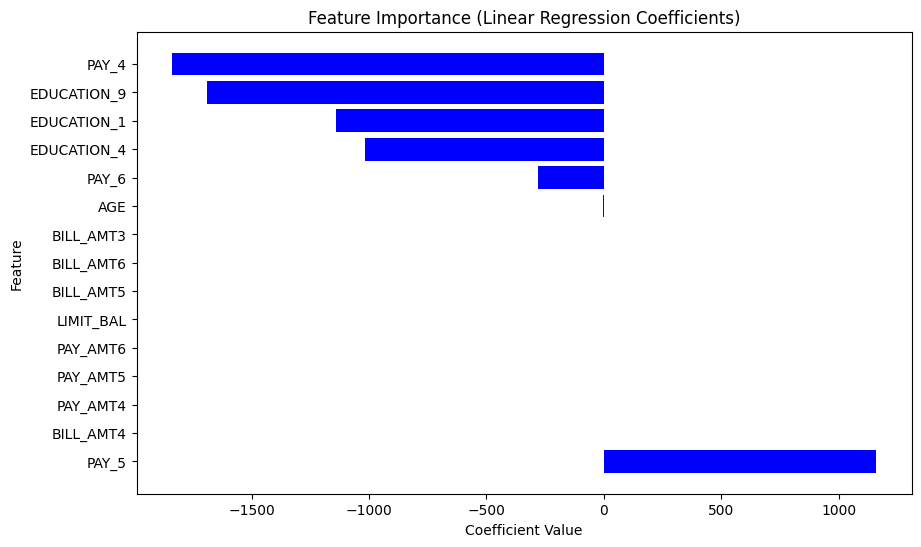

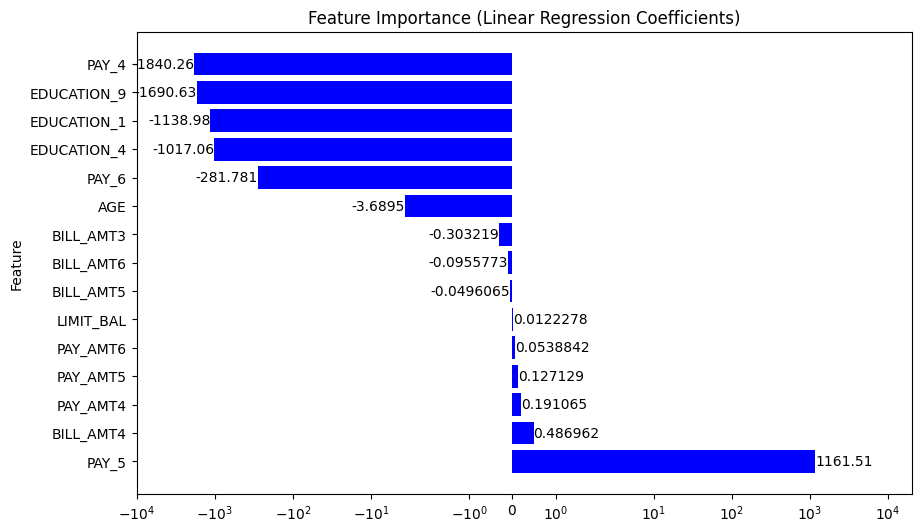

In [38]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

print("SCORE: ", linreg.score(X_train, y_train), end=' ')
ls_scores = cross_val_score(cv = 4, estimator=linreg, X=X_train, y=y_train)
print(ls_scores)
print("MEAN", np.mean(ls_scores))
print("STD", np.std(ls_scores))

# Make predictions.
y_pred = linreg.predict(X_train) 
y_train = pd.DataFrame(y_train)


# Calculate and print errors.
r2 = r2_score(y_train, y_pred)
print(f"R-squared: {r2:.4f}")
mse = mean_squared_error(y_train, y_pred)
print(f"Mean squared error: {mse:.4f}")
rmse = mse ** 0.5
print(f"Root mean squared error: {rmse:.4f}")
mae = mean_absolute_error(y_pred=y_pred, y_true=y_train)
print(f"Mean Absolute Error: {mae:.4f}")

plt.figure(figsize=(10,5))
# Plot 1: Residuals Distribution.
plt.subplot(1,2,1)
residuals = y_train - linreg.predict(X_train)
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Residuals Distribution")
plt.xlabel("Residuals (y_actual - y_predicted)")
plt.ylabel("Frequency")

x_ = np.array(y_train)[:,0]
y_ = y_pred[:,0]
# Plot 2: Regression Fit (Actual vs Predicted).
plt.subplot(1,2,2)
sns.scatterplot(x=x_, y=y_, alpha=0.7)
plt.plot([min(x_), max(x_)], [min(x_), max(x_)], color='red', linestyle='--')  # Perfect fit line
plt.title("Regression Fit: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()

#print("Model coefficients:\n")
for i in range(X_train.shape[1]):
    print(X_train_cols[i], "=", linreg.coef_[0][i].round(10))

# Extraer información del modelo
print("Intercept:", linreg.intercept_)
coeff_df = pd.DataFrame({"Feature": X_train_cols, "Coefficient": linreg.coef_[0]})
print("\nFeature Coefficients:\n", coeff_df)

# Resumir los resultados del modelo 
# Sort dataframe by coefficients.
coef_df_sorted = coeff_df.sort_values(by="Coefficient", ascending=False)

# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient", color="blue")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()


# Create plot.
plt.figure(figsize=(10,6))
#plt.barh(coeff_df["Feature"], coef_df_sorted["Coefficient"], color="blue")
ax = plt.barh(data=coef_df_sorted, y="Feature", width="Coefficient", color="blue")
plt.xlim(-10000, 20000)
plt.xscale('symlog')  # Use 'symlog' for signed data (both positive and negative)
plt.bar_label(ax, label_type='edge')
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()

In [39]:
pd.to_pickle(linreg, "/Users/gblasd/Documents/DataScience/02_SupervisedLearning/notebooks/Exams/BlasDuranGustavo_PAY_AMT3.pickle")

In [40]:
def procesar_dataframe(df):

    df[ 'Num_Meses_Con_Retraso' ] = df[['PAY_6', 'PAY_5', 'PAY_4']].apply(lambda row: (row > 0).sum(), axis=1)
    df[ 'Max_Meses_Con_Retraso' ] = df[['PAY_6', 'PAY_5', 'PAY_4']].apply(lambda row: max(list(filter(lambda x: x > 0, row)), default=0), axis=1)
    df[ 'Max_Retraso_Reciente' ] = df[['PAY_4', 'PAY_5']].apply(lambda row: max(list(filter(lambda x: x > 0,row)), default=0), axis=1)
  
    lst_var_1 = ['Num_Meses_Con_Retraso', 'Max_Meses_Con_Retraso', 'Max_Retraso_Reciente']

    df[ 'Promedio_Deuda_Ultimos_3_Meses' ] = df[['BILL_AMT3','BILL_AMT4','BILL_AMT5']].apply(lambda row: row.mean(), axis=1)
    df[ 'Cambio_Deuda_Reciente' ] = df[['BILL_AMT6','BILL_AMT3','BILL_AMT4','BILL_AMT5']].apply(lambda row: row['BILL_AMT3'] - row['BILL_AMT4'], axis=1)
    df[ 'Suma_Deuda_Total_Historica' ] = df[['BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.sum(), axis=1)
    df[ 'Max_Deuda_Historica' ] = df[['BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].apply(lambda row: row.max(), axis=1)
    df[ 'Utilizacion_Credito_Actual' ] = df.apply(lambda row: (row['BILL_AMT3'] / row['LIMIT_BAL'])*100*row['LIMIT_BAL'], axis=1)
    df[ 'Prom_porcen_uso_Credito_Actual' ] = df.apply(lambda row: (row['BILL_AMT3'] / row['LIMIT_BAL'])*100, axis=1)
    df[ 'Utilizacion_Credito_Promedio' ] = df.apply(lambda row: (row[['BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum()/ row['LIMIT_BAL']*6)*100 , axis=1)

    lst_var_2 = ['Promedio_Deuda_Ultimos_3_Meses', 'Cambio_Deuda_Reciente', 'Suma_Deuda_Total_Historica', 'Max_Deuda_Historica',
                'Utilizacion_Credito_Actual', 'Prom_porcen_uso_Credito_Actual', 'Utilizacion_Credito_Promedio']
    
    df['Promedio_Pago_Ultimos_Meses'] = df[['PAY_AMT5','PAY_AMT4']].apply(lambda row: row.sum()/3, axis=1)
    df['Suma_Pagos_Historicos'] = df[['PAY_AMT6','PAY_AMT5','PAY_AMT4']].apply(lambda row: row.sum(), axis=1)
    df['Prom_Porcentaje_Pagos_Historicos'] = df.apply(lambda row: get_mean_pay(row=row), axis=1)
    df['Cambio_Pago_Reciente'] = df.apply(lambda row: row['PAY_AMT5'] - row['PAY_AMT4'], axis=1)
    df['Ratio_Pago_Factura_Anterior'] = np.where(df['BILL_AMT4'] > 0, (df['PAY_AMT4'] / df['BILL_AMT4'])*100, 0)

    df['LIMIT_BAL_sq'] = df['LIMIT_BAL'] ** 2

    lst_var_3 = ['Promedio_Pago_Ultimos_Meses', 'Suma_Pagos_Historicos', 'Prom_Porcentaje_Pagos_Historicos',
             'Cambio_Pago_Reciente', 'Ratio_Pago_Factura_Anterior', 'LIMIT_BAL_sq']
    
    df[ 'Edad_x_Limite_Credito' ] = df.apply(lambda row: row['AGE'] * row['LIMIT_BAL'], axis=1)

    lst_var_4 = ['Edad_x_Limite_Credito']

    # (1=preparatoria, 2=universidad, 3=secundaria, 4=otros, 5=desconocido, 6=desconocido, 0=nulo)
    df['EDUCATION'].replace({4:0,5:0,6:0}, inplace=True) # clasificacion de valores desconocido
    df['EDUCATION'].replace({3:2, 2:3}, inplace=True) # cambiamos el orden de los valores, para darle mas peso
    #display(df['EDUCATION'].value_counts().sort_index())
    df['EDUCATION'] = df['EDUCATION']**2
    #display(df['EDUCATION'].value_counts().sort_index())

    # * MARRIAGE: Estatus marital (1=casado, 2=soltero, 3=otros, 0=nulo)
    # display(df['MARRIAGE'].value_counts().sort_index())
    df['MARRIAGE'].replace({0:2, 3:2}, inplace=True)
    # display(df['MARRIAGE'].value_counts().sort_index())

    df['SEX'] = df['SEX'].astype(str)
    df['EDUCATION'] = df['EDUCATION'].astype(str)
    df['MARRIAGE'] = df['MARRIAGE'].astype(str)

    df['PAY_4'] = df['PAY_4'].map(lambda x: x if x > 0 else 0)
    df['PAY_5'] = df['PAY_5'].map(lambda x: x if x > 0 else 0)
    df['PAY_6'] = df['PAY_6'].map(lambda x: x if x > 0 else 0)

    # Unidad muestral
    var_um = ['CUSTOMER_ID']

    # Variables categoricas
    var_cat = ['SEX', 'EDUCATION', 'MARRIAGE',
                                    'PAY_4',    'PAY_5',    'PAY_6']

    # Variables numericas
    var_num = ['LIMIT_BAL','AGE',
                        'BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
                                    'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',              
            ] + lst_var_1 + lst_var_2 + lst_var_3 + lst_var_4
            #] + lst_var_4

    var_tgt = ['PAY_AMT3']

    X = df.drop(columns=var_cat)[ var_um + var_num ].join(pd.get_dummies(df[var_cat], dtype='int'))
    
    return X

#ls_best = ['LIMIT_BAL','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT3','PAY_AMT4','PAY_AMT5',
#           'Promedio_Deuda_Ultimos_3_Meses','Cambio_Deuda_Reciente','Suma_Deuda_Total_Historica','Max_Deuda_Historica','Promedio_Pago_Ultimos_Meses','Suma_Pagos_Historicos']

df = pd.read_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/data/Examen_1/val_PAY_AMT3.csv', delimiter='|')
df.head()

val_PAY_AMT2 = procesar_dataframe(df)[['CUSTOMER_ID'] + ls_best]
print( val_PAY_AMT2.shape )
val_PAY_AMT2.head()


(1875, 16)


,CUSTOMER_ID,LIMIT_BAL,AGE,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT4,PAY_AMT5,PAY_AMT6,PAY_4,PAY_5,PAY_6,EDUCATION_1,EDUCATION_4,EDUCATION_9
0,17231,"20,000.00",45,"28,400.00","29,400.00","30,000.00",0.00,600.00,0.00,0.00,0,0,0,0,1,0
1,9068,"60,000.00",27,"38,840.00","31,965.00","30,297.00","29,814.00","1,037.00","1,218.00","1,085.00",0,0,0,0,0,1
2,23928,"180,000.00",24,"176,686.00","165,491.00","169,222.00","173,246.00","6,400.00","7,000.00","7,000.00",0,0,0,1,0,0
3,19946,"170,000.00",40,"144,225.00","111,983.00",0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0
4,8157,"100,000.00",29,"77,303.00","60,178.00","56,436.00","51,773.00","1,950.00","2,001.00","18,000.00",0,0,0,1,0,0


In [41]:
results = pd.DataFrame(
    {'CUSTOMER_ID': val_PAY_AMT2['CUSTOMER_ID'],
    'y_hat':  pd.DataFrame(linreg.predict( val_PAY_AMT2[ ls_best ] ))[0]}
)

In [42]:
results

,CUSTOMER_ID,y_hat
0,17231,"5,545.41"
1,9068,943.35
2,23928,"7,676.00"
3,19946,"14,883.08"
4,8157,"1,842.66"
...,...,...
1870,20243,"3,149.55"
1871,4071,"4,799.22"
1872,22216,"1,895.42"
1873,12927,"14,081.01"


In [43]:
results.to_csv('/Users/gblasd/Documents/DataScience/02_SupervisedLearning/notebooks/Exams/BlasDuranGustavo_PAY_AMT3.csv', index=False)

<Axes: ylabel='Frequency'>

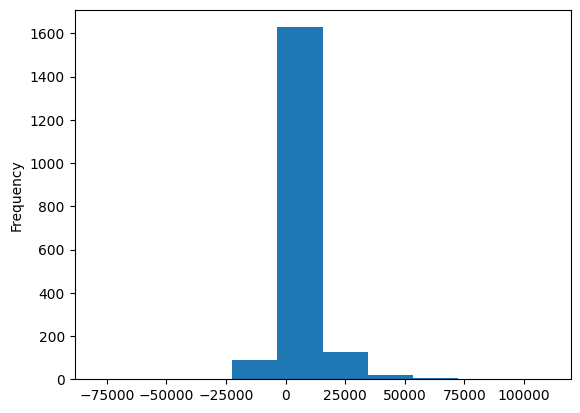

In [44]:
results['y_hat'].plot(kind='hist')